In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [27]:
path_prefix = "D:/prova/"  # "~ Documents/"  # data-raw path
path = "data-raw/DS1/"  # training files directory
test_path = "data-raw/DS2/"  # testing files directory

# Load the first file of OK, IN, STAND lists
def load_data(path, OK_csv, IN_csv, STAND_csv):
    df_ok, df_in, df_stand = None, None, None
    
    # Load just the first name of csv file, I want to keep them separate
    if OK_csv is not None:
        df1 = pd.read_csv(path_prefix + path + OK_csv[0], sep='\t')
        df_ok = pd.concat([df1], sort=False, ignore_index=True)
        df_ok['Class'] = 'OK'
    if IN_csv is not None:
        df2 = pd.read_csv(path_prefix + path + IN_csv[0], sep='\t')
        df_in = pd.concat([df2], sort=False, ignore_index=True)
        df_in['Class'] = 'IN'
    if STAND_csv is not None:
        df3 = pd.read_csv(path_prefix + path + STAND_csv[0], sep='\t')
        df_stand = pd.concat([df3], sort=False, ignore_index=True)
        df_stand['Class'] = 'STANDING'
    
    return df_ok, df_in, df_stand

""" Return the max and min values in ls """
def maxmin(ls):
    ret_max = -100
    ret_min = +100

    for l in ls:
        mx = np.amax(l)
        mn = np.amin(l)
        ret_max = mx if mx > ret_max else ret_max
        ret_min = mn if mn < ret_min else ret_min

    return ret_max, ret_min

In [7]:
""" load the first files ok, in, stand for the filtering """
OK_csv = ["OK1.csv","OK2.csv", "OK3.csv", "OK4.csv"] 
IN_csv = ["IN1.csv"]
STAND_csv = ["STANDING1.csv", "STANDING2.csv"]
OK_test_csv = ["OK1.csv"]
IN_test_csv = ["IN1.csv"]
STAND_test_csv = ["STANDING1.csv", "STANDING2.csv", "STANDING3.csv", "STANDING4.csv"]

In [8]:
# load files for signals print
# training data DS1
df_ok, df_in, df_stand = load_data(path, OK_csv, IN_csv, STAND_csv)

In [9]:
# testing data DS2
df_ok_test, df_in_test, df_stand_test = load_data(test_path, OK_test_csv, IN_test_csv, STAND_test_csv)

In [10]:
# plot temporal singnals
def plot_signals(sig, title='noisy'):
    mx, mn = maxmin(sig)
    fig, axs = plt.subplots(nrows=len(sig), ncols=1, figsize=(18, 10))
    plt.xlabel("time in s")
    time = np.arange(len(sig[0])) / Fs
    axs[0].set_title(title)
    for i in range(0, len(sig)):
        axs[i].plot(time, sig[i])
        axs[i].set_ylabel("ACC in g")
        axs[i].set_ylim([mn, mx])

    return fig, axs

# From noisy Data(y1, y2, y3) apply median filter and then produce the plot
# blue signal: with noise, orange signal: without noise(after the filtering)
def plot_signals_compare(y1, y2, y3, w=7):
    fig, axs = plot_signals([y1, y2, y3])
    mf_y1 = medfilt(y1, w)
    mf_y2 = medfilt(y2, w)
    mf_y3 = medfilt(y3, w)
    axs[0].plot(np.arange(Fs) / Fs, mf_y1)
    axs[1].plot(np.arange(Fs) / Fs, mf_y2)
    axs[2].plot(np.arange(Fs) / Fs, mf_y3)
    # fig, axs = plot_signals([mf_y1, mf_y2, mf_y3])
    fig.tight_layout()
    plt.show()


def plot_signals_compare_dfokinstand(yokX, yinX, ystandX, yokY, yinY, ystandY, yokZ, yinZ, ystandZ, w=7):
    mf_yokX = medfilt(yokX, w)
    mf_yinX = medfilt(yinX, w)
    mf_ystandX = medfilt(ystandX, w)
    mf_yokY = medfilt(yokY, w)
    mf_yinY = medfilt(yinY, w)
    mf_ystandY = medfilt(ystandY, w)
    mf_yokZ = medfilt(yokZ, w)
    mf_yinZ = medfilt(yinZ, w)
    mf_ystandZ = medfilt(ystandZ, w)
    
    fig, axs = plot_signals([mf_yokX, mf_yokY, mf_yokZ])
    axs[0].plot(np.arange(Fs) / Fs, mf_yinX)
    axs[0].plot(np.arange(Fs) / Fs, mf_ystandX)
    
    axs[1].plot(np.arange(Fs) / Fs, mf_yinY)
    axs[1].plot(np.arange(Fs) / Fs, mf_ystandY)
    
    axs[2].plot(np.arange(Fs) / Fs, mf_yinZ)
    axs[2].plot(np.arange(Fs) / Fs, mf_ystandZ)
    
    
    fig.tight_layout()
    plt.show()

In [11]:
Fs = 25000 # sample frequency
window = 5 # length of the window for the median filter

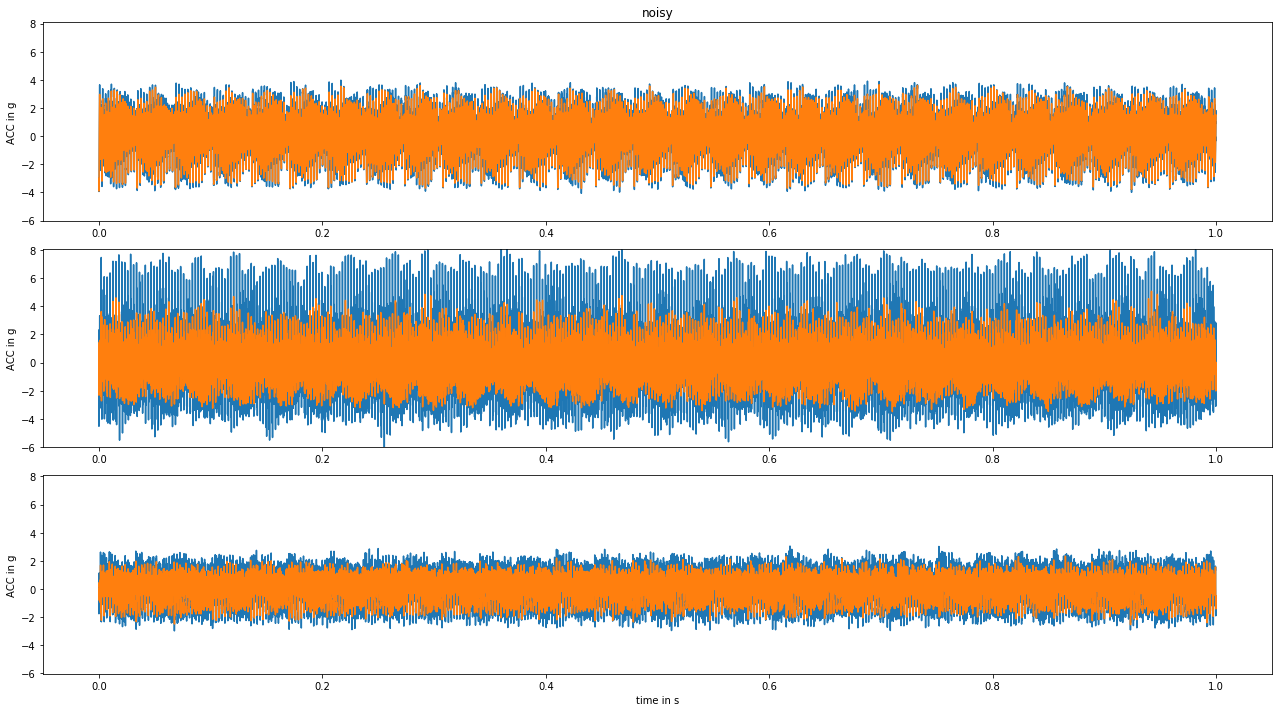

In [12]:
# Comparing df_ok before and after the signal denoising on x, y, z axes
# P1
y1 = df_ok.iloc[0:Fs]['P1_x']
y2 = df_ok.iloc[0:Fs]['P1_y']
y3 = df_ok.iloc[0:Fs]['P1_z']

plot_signals_compare(y1, y2, y3, window)
# More noise in the y component of the OK dataframe 

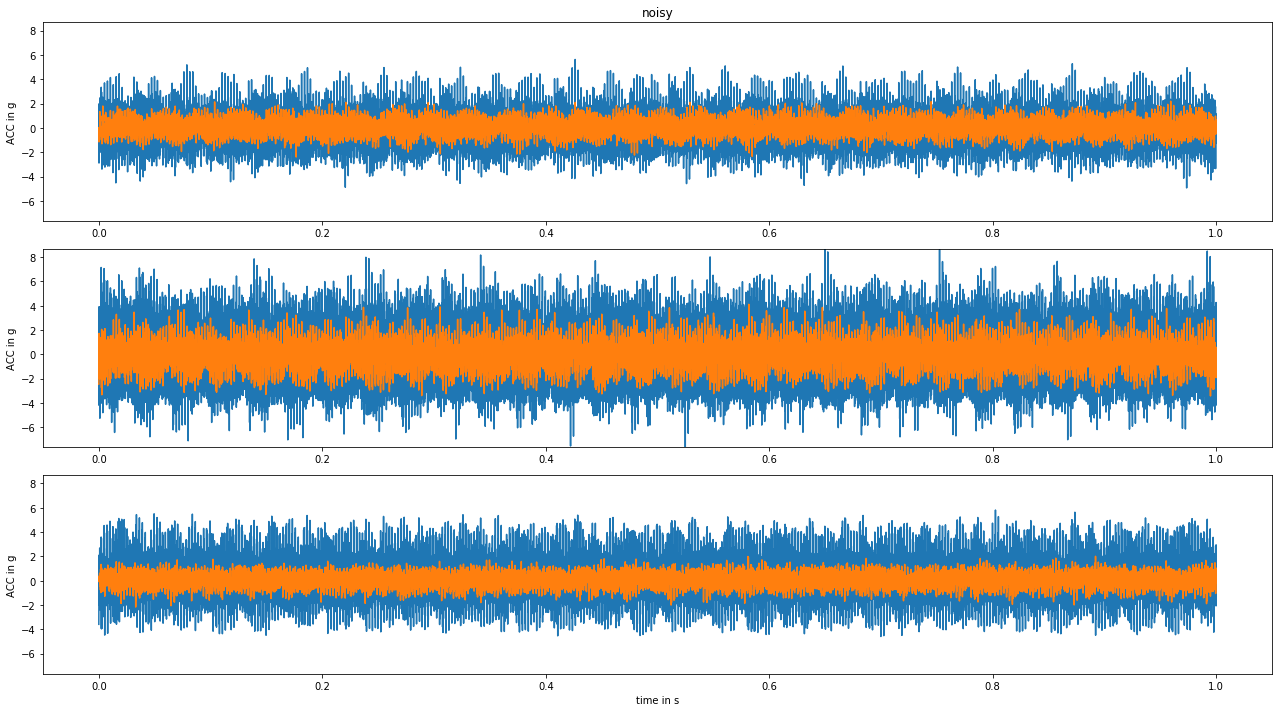

In [13]:
# P2 more noise here than P1...
y1 = df_ok.iloc[0:Fs]['P2_x']
y2 = df_ok.iloc[0:Fs]['P2_y']
y3 = df_ok.iloc[0:Fs]['P2_z']

plot_signals_compare(y1, y2, y3, window)
#... x and z components more noisy

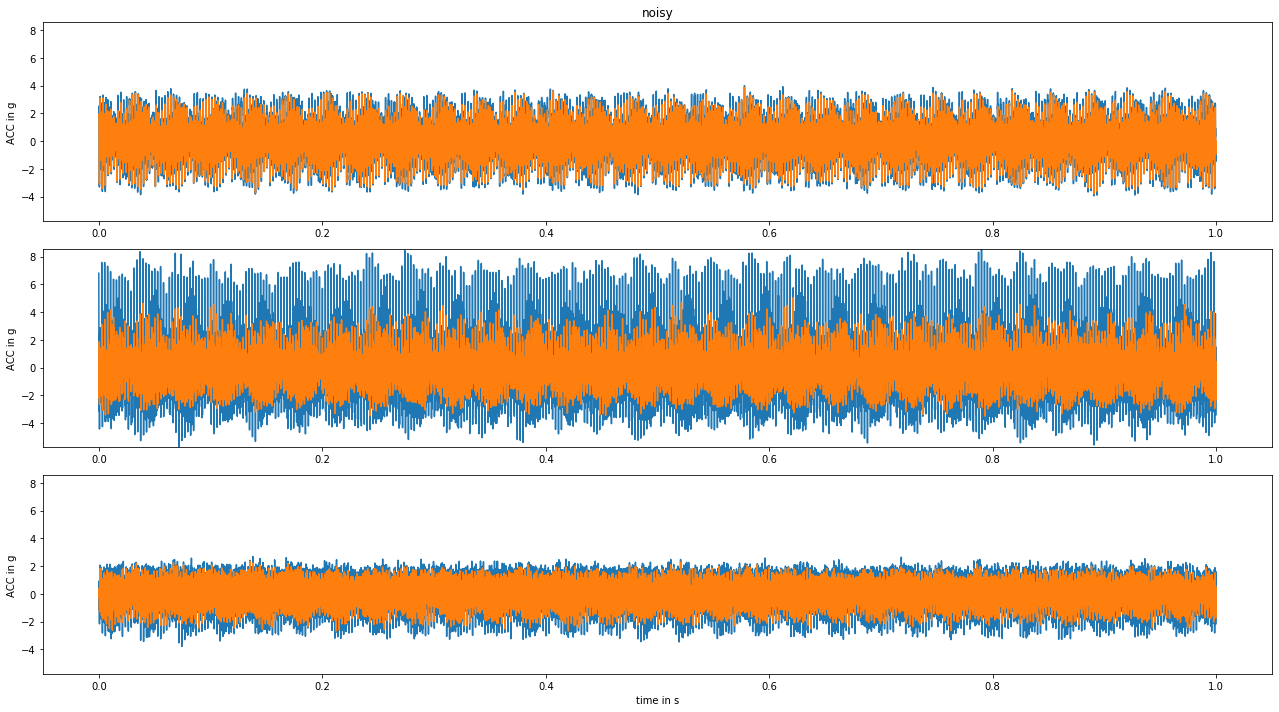

In [14]:
# Comparing df_in before and after the signal denoising on x, y, z axes
# P1
y1 = df_in.iloc[0:Fs]['P1_x']
y2 = df_in.iloc[0:Fs]['P1_y'] # always lots of noise removed
y3 = df_in.iloc[0:Fs]['P1_z']

plot_signals_compare(y1, y2, y3, window)

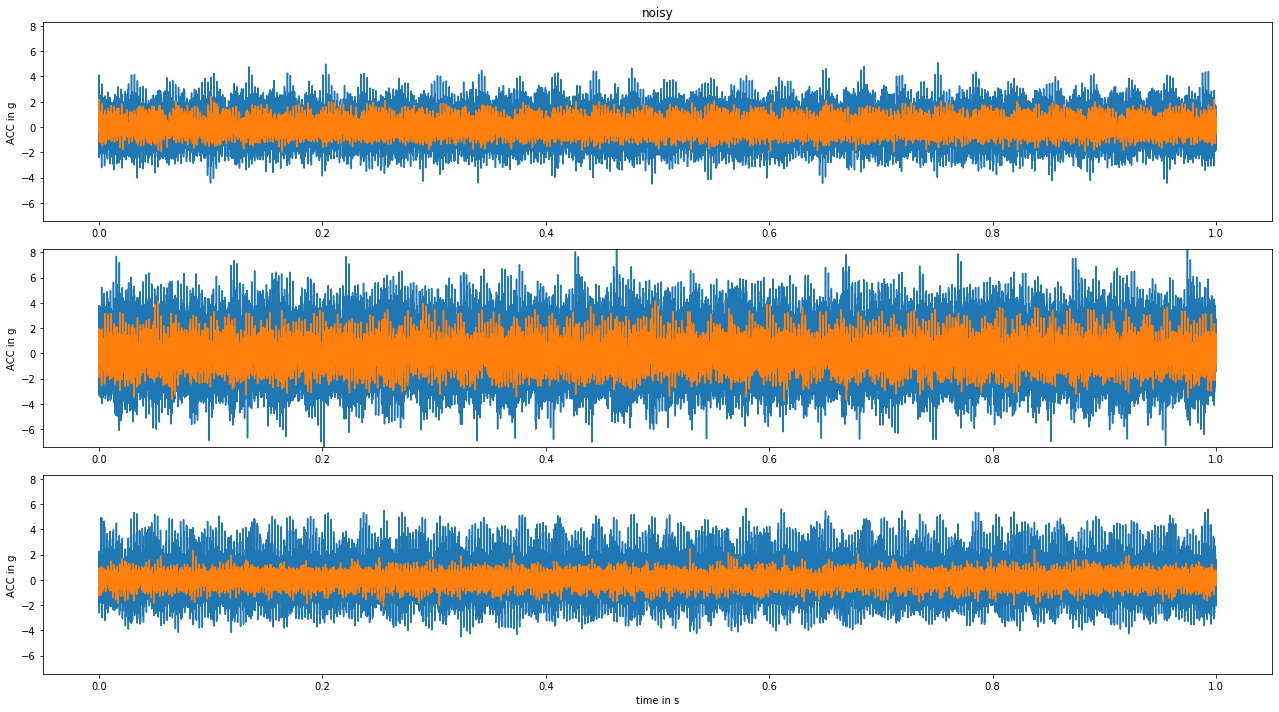

In [15]:
#P2 - always more noise here than P1
y1 = df_in.iloc[0:Fs]['P2_x']
y2 = df_in.iloc[0:Fs]['P2_y']
y3 = df_in.iloc[0:Fs]['P2_z']

plot_signals_compare(y1, y2, y3, window)

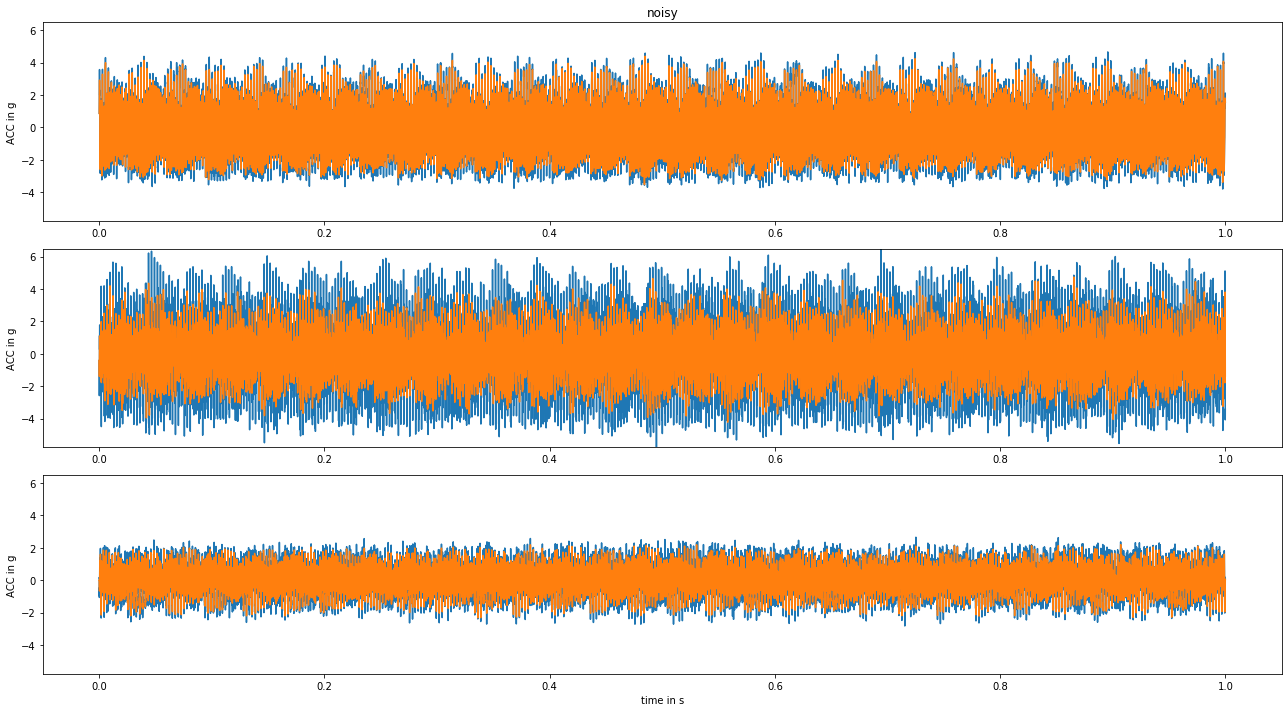

In [16]:
# Comparing df_standing before and after denoising on x, y, z axes
#P1
y1 = df_stand.iloc[0:Fs]['P1_x']
y2 = df_stand.iloc[0:Fs]['P1_y']
y3 = df_stand.iloc[0:Fs]['P1_z']

plot_signals_compare(y1, y2, y3, window)

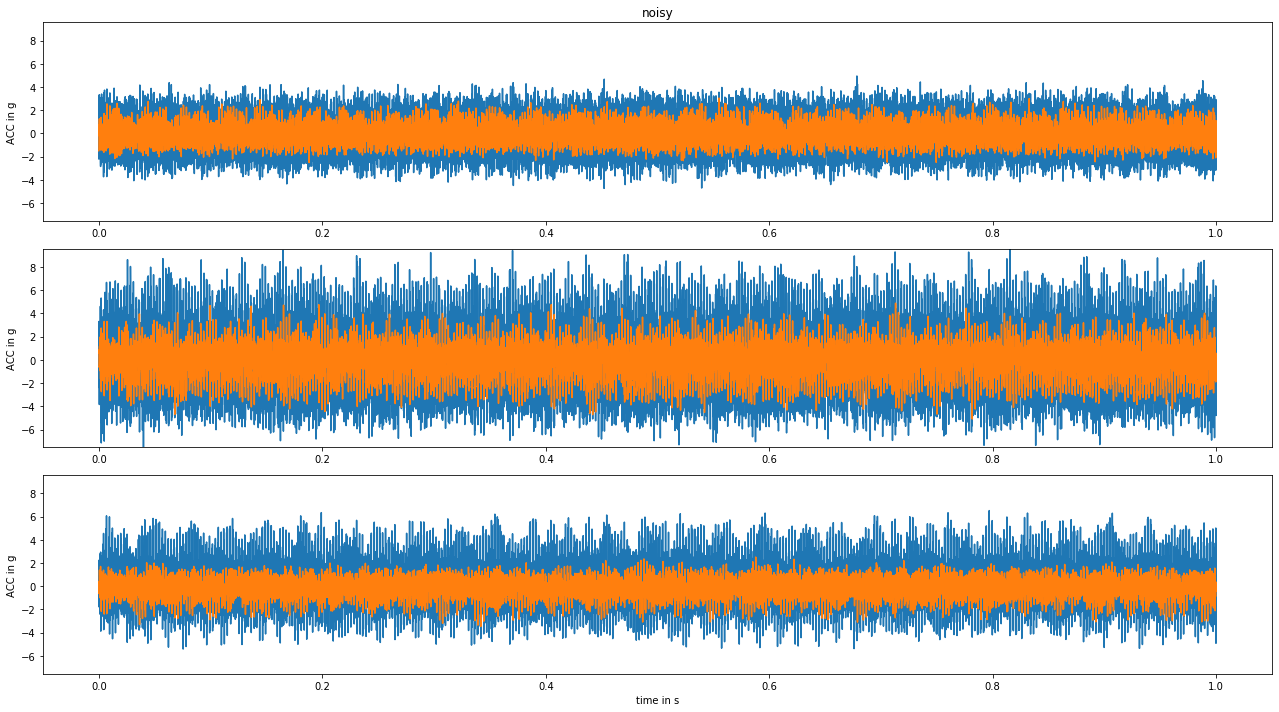

In [17]:
#P2 - always more noise here than P1
y1 = df_stand.iloc[0:Fs]['P2_x']
y2 = df_stand.iloc[0:Fs]['P2_y']
y3 = df_stand.iloc[0:Fs]['P2_z']

plot_signals_compare(y1, y2, y3, window)

In [18]:
"""P2 Data seem to have more noise than P1 Data""" 

'P2 Data seem to have more noise than P1 Data'

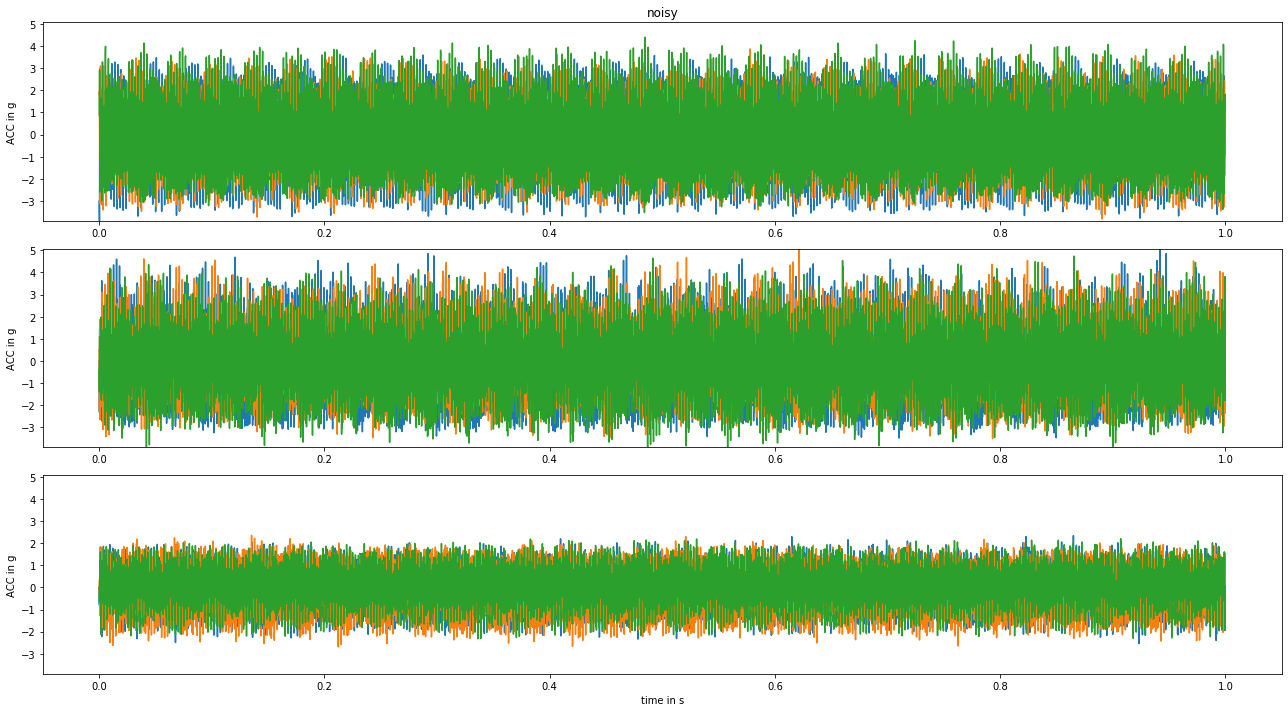

' different signal trend in the first second '

In [19]:
# Comparing filtered df_ok, df_in, df_stand on X, Y, Z separately
# P1
# BLUE ok, ORANGE in, GREEN stand
# df_ok_X, df_in_X, df_stand_X
# df_ok_Y, df_in_Y, df_stand_Y
# df_ok_Z, df_in_Z, df_stand_Z

yokX = df_ok.iloc[0:Fs]['P1_x']
yinX = df_in.iloc[0:Fs]['P1_x']
ystandX = df_stand.iloc[0:Fs]['P1_x']

yinY = df_in.iloc[0:Fs]['P1_y']
yokY = df_ok.iloc[0:Fs]['P1_y']
ystandY = df_stand.iloc[0:Fs]['P1_y']

yokZ = df_ok.iloc[0:Fs]['P1_z']
yinZ = df_in.iloc[0:Fs]['P1_z']
ystandZ = df_stand.iloc[0:Fs]['P1_z']

plot_signals_compare_dfokinstand(yokX, yinX, ystandX, yokY, yinY, ystandY, yokZ, yinZ, ystandZ, window)

""" different signal trend in the first second """

In [20]:
# Function to convert noisy Data to filtered Data(saved in the file system)
def df_to_filtered(df, path_output, Fs=25000, file_name_output='output_filtered'):
    
    features_to_filter = ['P1_x', 'P1_y', 'P1_z', 'P2_x', 'P2_y', 'P2_z']
    windows = [5, 15] # , 7, 9, 11, 13, 15] Produce different csv files for each window we want
    
    for window in windows:
        df_filtered = pd.DataFrame()
        for i in range(0, len(df)//Fs):
            df_temp = pd.DataFrame()
            f = i * Fs
            t = f + Fs
            
            df_temp['cycle'] = df.iloc[f:t]['cycle'].reset_index(drop=True)
            
            for ftf in features_to_filter:
                df_temp[ftf] = medfilt(df.iloc[f:t][ftf], window)
            
            df_temp['time'] = df.iloc[f:t]['time'].reset_index(drop=True)
            df_temp['Class'] = df.iloc[f:t]['Class'].reset_index(drop=True)
            
            df_filtered = pd.concat([df_filtered,df_temp], sort=False, ignore_index=True)
        
        df_filtered.to_csv(path_prefix + path_output + file_name_output + '_FILTERED_w' + str(window) + '.csv' , 
                           sep='\t', index=False, encoding='utf-8')
        # ex: from DS1/OK3.csv --> DS1/FILTERED/OK3_FILTERED_w5.csv and DS1/FILTERED/OK3_FILTERED_w15.csv
        
    return df_filtered # return the last saved df


In [21]:
"""
/DS1/
---> OK1, OK2, OK3, OK4, IN1, STANDING1, STANDING2[.csv]
Filter the files OK3, OK4, IN1, STANDING1
OK4:4.500.000 rows ==> 180examples(4.5M/25k)
IN1 first 4.5M/5.325M of rows
STANDING1 first 4.5M/17.775M of rows
/DS1/FILTERED
--- --- ---> OK4_FILTERED_w#, IN1_FILTERED_w#, STANDING1_FILTERED_w#
con # = [5,15]
6 different version for each file

/DS2/
---> OK1, IN1, STANDING1, STANDING2, STANDING3, STANDING4
Filtered all the files with w=15
/DS2/FILTERED
"""

'\n/DS1/\n---> OK1, OK2, OK3, OK4, IN1, STANDING1, STANDING2[.csv]\nFilter the files OK3, OK4, IN1, STANDING1\nOK4:4.500.000 rows ==> 180examples(4.5M/25k)\nIN1 first 4.5M/5.325M of rows\nSTANDING1 first 4.5M/17.775M of rows\n/DS1/FILTERED\n--- --- ---> OK4_FILTERED_w#, IN1_FILTERED_w#, STANDING1_FILTERED_w#\ncon # = [5,15]\n6 different version for each file\n\n/DS2/\n---> OK1, IN1, STANDING1, STANDING2, STANDING3, STANDING4\nFiltered all the files with w=15\n/DS2/FILTERED\n'

In [22]:
# to remove the noise from data
df_to_filtered(df_ok, "data-raw/DS1/FILTERED/", 25000,'OK1') # save df_ok in OK1.csv
df_to_filtered(df_in, "data-raw/DS1/FILTERED/", 25000,'IN1') # save df_in in IN1.csv
df_to_filtered(df_stand, "data-raw/DS1/FILTERED/", 25000,'STANDING1') # save df_stand in STANDING1.csv

,cycle,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,time,Class
0,0,0.869764,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 08:51:26.343000,STANDING
1,1,1.380942,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 08:51:26.343000,STANDING
2,2,2.146944,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 08:51:26.343000,STANDING
3,3,2.146944,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 08:51:26.343000,STANDING
4,4,2.293431,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 08:51:26.343000,STANDING
...,...,...,...,...,...,...,...,...,...
17774995,74995,0.167849,0.624094,0.0,0.978103,0.0,0.0,2013-01-10 09:03:14.390000,STANDING
17774996,74996,0.000000,0.000000,0.0,0.907912,0.0,0.0,2013-01-10 09:03:14.390000,STANDING
17774997,74997,0.000000,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 09:03:14.390000,STANDING
17774998,74998,0.000000,0.000000,0.0,0.000000,0.0,0.0,2013-01-10 09:03:14.390000,STANDING


In [23]:
df_to_filtered(df_ok_test, "data-raw/DS2/FILTERED/", 25000,'OK') # save df_ok_test in OK.csv
df_to_filtered(df_in_test, "data-raw/DS2/FILTERED/", 25000,'IN') # save df_in_test in IN.csv
df_to_filtered(df_stand_test, "data-raw/DS2/FILTERED/", 25000,'STANDING1') # save df_stand_test in STANDING1.csv

,cycle,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,time,Class
0,0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,2013-01-11 09:32:20.718000,STANDING
1,1,0.000000,0.000000,0.00000,0.000000,0.0,0.0,2013-01-11 09:32:20.718000,STANDING
2,2,0.000000,0.000000,0.00000,0.000000,0.0,0.0,2013-01-11 09:32:20.718000,STANDING
3,3,0.000000,0.000000,0.00000,0.000000,0.0,0.0,2013-01-11 09:32:20.718000,STANDING
4,4,0.000000,0.000000,0.00000,-0.476081,0.0,0.0,2013-01-11 09:32:20.718000,STANDING
...,...,...,...,...,...,...,...,...,...
17549995,74995,2.641337,1.071183,0.05951,0.000000,0.0,0.0,2013-01-11 09:43:59.750000,STANDING
17549996,74996,2.641337,1.039139,0.00000,0.000000,0.0,0.0,2013-01-11 09:43:59.750000,STANDING
17549997,74997,2.493324,1.039139,0.00000,0.000000,0.0,0.0,2013-01-11 09:43:59.750000,STANDING
17549998,74998,0.477607,0.599680,0.00000,0.000000,0.0,0.0,2013-01-11 09:43:59.750000,STANDING


In [28]:
# load and filtering DS1/OK2, STANDING2 and DS2/STANDING2 
df_ok, df_in, df_stand = load_data(path, OK_csv[1:], None, STAND_csv[1:])
df_ok_test, df_in_test, df_stand_test = load_data(test_path, None, None, STAND_test_csv[1:])

df_to_filtered(df_ok, "data-raw/DS1/FILTERED/", 25000,'OK2')
df_to_filtered(df_stand, "data-raw/DS1/FILTERED/", 25000,'STANDING2')

df_to_filtered(df_stand_test, "data-raw/DS2/FILTERED/", 25000,'STANDING2') 

,cycle,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,time,Class
0,0,-0.959792,0.000000,0.0,0.0,0.000000,0.000000,2013-01-11 09:44:02.750000,STANDING
1,1,-1.307698,0.000000,0.0,0.0,0.000000,0.000000,2013-01-11 09:44:02.750000,STANDING
2,2,-2.259861,0.000000,0.0,0.0,0.000000,0.000000,2013-01-11 09:44:02.750000,STANDING
3,3,-2.609293,0.000000,0.0,0.0,0.000000,0.000000,2013-01-11 09:44:02.750000,STANDING
4,4,-2.670329,-0.070191,0.0,0.0,0.000000,0.000000,2013-01-11 09:44:02.750000,STANDING
...,...,...,...,...,...,...,...,...,...
10874995,74995,-2.207980,0.271611,0.0,0.0,0.277714,0.387579,2013-01-11 09:51:14.765000,STANDING
10874996,74996,-2.207980,0.271611,0.0,0.0,0.000000,0.000000,2013-01-11 09:51:14.765000,STANDING
10874997,74997,-2.206454,0.271611,0.0,0.0,0.000000,0.000000,2013-01-11 09:51:14.765000,STANDING
10874998,74998,-1.789883,0.271611,0.0,0.0,0.000000,0.000000,2013-01-11 09:51:14.765000,STANDING


In [29]:
# load and filtering DS1/OK3 and DS2/STANDING3
df_ok, df_in, df_stand = load_data(path, OK_csv[2:], None, None)
df_ok_test, df_in_test, df_stand_test = load_data(test_path, None, None, STAND_test_csv[2:])

df_to_filtered(df_ok, "data-raw/DS1/FILTERED/", 25000,'OK3')

df_to_filtered(df_stand_test, "data-raw/DS2/FILTERED/", 25000,'STANDING3') 

,cycle,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,time,Class
0,0,-1.232929,0.0,0.00000,0.0,0.0,0.0,2013-01-11 09:51:17.765000,STANDING
1,1,-1.232929,0.0,0.00000,0.0,0.0,0.0,2013-01-11 09:51:17.765000,STANDING
2,2,-1.232929,0.0,0.00000,0.0,0.0,0.0,2013-01-11 09:51:17.765000,STANDING
3,3,-1.232929,0.0,0.00000,0.0,0.0,0.0,2013-01-11 09:51:17.765000,STANDING
4,4,-1.232929,0.0,0.00000,0.0,0.0,0.0,2013-01-11 09:51:17.765000,STANDING
...,...,...,...,...,...,...,...,...,...
5249995,74995,0.000000,0.0,0.77821,0.0,0.0,0.0,2013-01-11 09:54:44.781000,STANDING
5249996,74996,0.000000,0.0,0.77821,0.0,0.0,0.0,2013-01-11 09:54:44.781000,STANDING
5249997,74997,0.000000,0.0,0.77821,0.0,0.0,0.0,2013-01-11 09:54:44.781000,STANDING
5249998,74998,0.000000,0.0,0.77821,0.0,0.0,0.0,2013-01-11 09:54:44.781000,STANDING


In [30]:
# load and filtering DS1/OK4 and DS2/STANDING4 
df_ok, df_in, df_stand = load_data(path, OK_csv[3:], None, None)
df_ok_test, df_in_test, df_stand_test = load_data(test_path, None, None, STAND_test_csv[3:])

df_to_filtered(df_ok, "data-raw/DS1/FILTERED/", 25000,'OK4')

df_to_filtered(df_stand_test, "data-raw/DS2/FILTERED/", 25000,'STANDING4') 


,cycle,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,time,Class
0,0,-1.463340,0.000000,0.00000,0.000000,0.0,0.000000,2013-01-11 09:54:50.781000,STANDING
1,1,-1.797513,0.000000,0.00000,0.000000,0.0,0.000000,2013-01-11 09:54:50.781000,STANDING
2,2,-1.797513,0.000000,0.00000,-0.097658,0.0,0.167849,2013-01-11 09:54:50.781000,STANDING
3,3,-1.797513,0.000000,0.00000,-0.097658,0.0,0.793469,2013-01-11 09:54:50.781000,STANDING
4,4,-1.797513,0.000000,0.00000,-0.582895,0.0,0.831617,2013-01-11 09:54:50.781000,STANDING
...,...,...,...,...,...,...,...,...,...
17024995,74995,-0.767529,-0.247196,0.16022,0.000000,0.0,0.000000,2013-01-11 10:06:08.812000,STANDING
17024996,74996,-0.643931,-0.215152,0.16022,0.000000,0.0,0.000000,2013-01-11 10:06:08.812000,STANDING
17024997,74997,-0.511177,0.000000,0.16022,0.000000,0.0,0.000000,2013-01-11 10:06:08.812000,STANDING
17024998,74998,-0.369268,0.000000,0.16022,0.000000,0.0,0.000000,2013-01-11 10:06:08.812000,STANDING
